# CREDIT

In [1]:
# # Object detection - YOLO - OpenCV
# Author : Arun Ponnusamy   (July 16, 2018)
# Website : http://www.arunponnusamy.com
############################################

In [2]:
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Specify inputs 

In [3]:
#our network and trained set
par_weights="yolov3.weights"
par_config="yolov3.cfg"

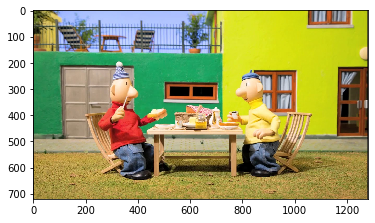

In [17]:
#image to analyze
par_img="patmat.jpg"
plt.imshow(mpimg.imread(par_img))

image = cv2.imread(par_img)

Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392



In [18]:
def get_output_layers(net):
    
    layer_names = net.getLayerNames()
    
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

    return output_layers


def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Object type we'll identify

In [24]:
    

classes = None


f= open( "yolov3.txt",'r')
classes=[line.strip() for line in f.readlines()]

print(classes[:120])

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Send Image to Neural network and collect Statistics

In [20]:
COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

#Define the NN
net = cv2.dnn.readNet(par_weights, par_config)

blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

net.setInput(blob)


outs = net.forward(get_output_layers(net))

class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4



for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            # save results as our confidence >50%
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

# Collect Object description  and draw boxes

In [21]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

for i in indices:
    i = i[0]
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

# Show result

In [22]:
cv2.imshow("object detection", image)
#cv2.waitKey()

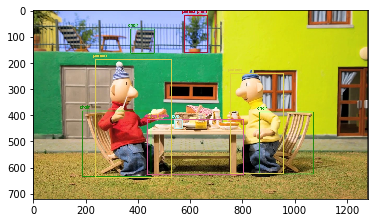

In [23]:
cv2.imwrite("object-detection.jpg", image)
cv2.destroyAllWindows()
plt.imshow(mpimg.imread("object-detection.jpg"))